# 1 Import modules

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import *

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



# 2 Getting Data

In [2]:
# data = '/kaggle/input/tesla-stock-data-updated-till-28jun2021/TSLA.csv'
# df = pd.read_csv(data, parse_dates = True, index_col = "Date")

# # parse_dates to parse obj. data
# # index_col to make date column as an index


import yfinance as yf

start = '2010-01-01'
end = '2024-01-04'
symbol = 'SBIN.NS'
df = yf.download(symbol, start=start, end=end)
df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,227.500000,230.000000,227.500000,229.119995,195.716766,11031470
2010-01-05,230.800003,231.000000,228.009995,229.205002,195.789398,11613740
2010-01-06,229.699997,231.500000,228.500000,230.580002,196.963943,14527930
2010-01-07,230.600006,231.000000,228.110001,229.289993,195.861984,8576510
2010-01-08,229.399994,230.389999,228.009995,228.604996,195.276871,10453820
...,...,...,...,...,...,...
2023-12-28,650.250000,653.299988,646.500000,651.400024,651.400024,16982092
2023-12-29,645.500000,649.599976,639.549988,642.049988,642.049988,13221898
2024-01-01,642.200012,646.900024,638.000000,641.349976,641.349976,8295548


# 3 Lets Explore

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,227.500000,230.000000,227.500000,229.119995,195.716766,11031470
2010-01-05,230.800003,231.000000,228.009995,229.205002,195.789398,11613740
2010-01-06,229.699997,231.500000,228.500000,230.580002,196.963943,14527930
2010-01-07,230.600006,231.000000,228.110001,229.289993,195.861984,8576510
2010-01-08,229.399994,230.389999,228.009995,228.604996,195.276871,10453820


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-28,650.250000,653.299988,646.500000,651.400024,651.400024,16982092
2023-12-29,645.500000,649.599976,639.549988,642.049988,642.049988,13221898
2024-01-01,642.200012,646.900024,638.000000,641.349976,641.349976,8295548
2024-01-02,641.349976,648.000000,633.849976,639.450012,639.450012,15164482
2024-01-03,639.349976,648.000000,635.799988,643.450012,643.450012,14571772


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3457 entries, 2010-01-04 to 2024-01-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3457 non-null   float64
 1   High       3457 non-null   float64
 2   Low        3457 non-null   float64
 3   Close      3457 non-null   float64
 4   Adj Close  3457 non-null   float64
 5   Volume     3457 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 189.1 KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3.457000e+03
mean,301.511063,305.158256,297.371361,301.109677,284.258785,2.437305e+07
std,120.771275,121.591479,119.751143,120.712083,124.025583,1.902402e+07
min,147.000000,148.490005,145.270004,147.360001,134.248489,0.000000e+00
25%,219.000000,222.130005,215.750000,218.550003,195.282608,1.351020e+07
50%,266.000000,269.500000,262.019989,265.750000,246.387070,1.854326e+07
75%,322.200012,327.500000,317.700012,321.799988,304.765808,2.795246e+07
max,658.700012,660.400024,646.500000,655.400024,655.400024,2.626771e+08


In [7]:
df.shape

(3457, 6)

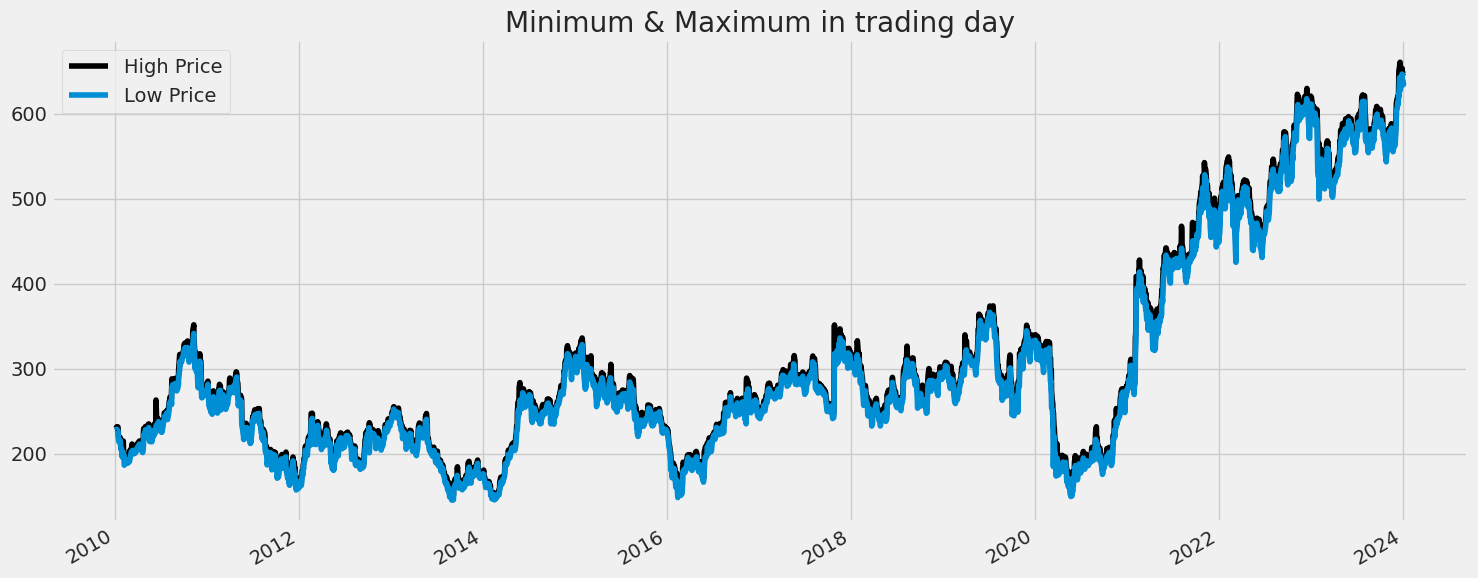

In [8]:
plt.figure(figsize=(15, 6))
df['High'].plot(c = 'black')
df['Low'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Minimum & Maximum in trading day")
plt.legend(['High Price', 'Low Price'])
plt.tight_layout()
plt.show()

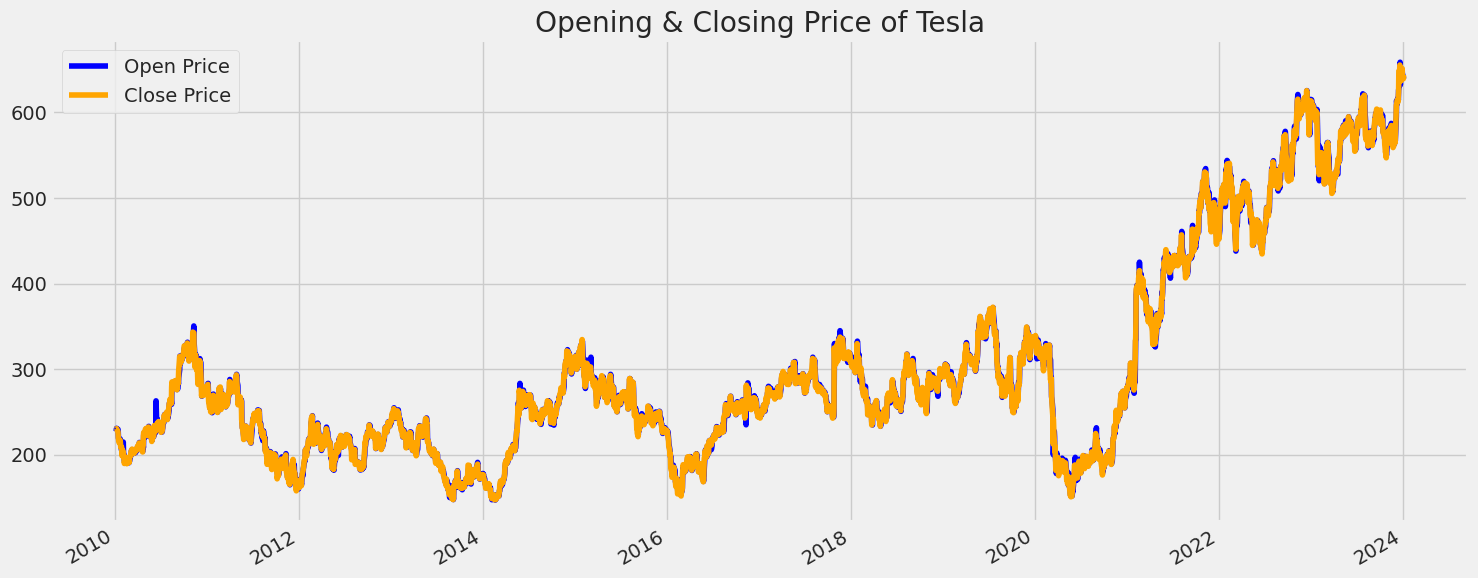

In [9]:
plt.figure(figsize=(15, 6))
df['Open'].plot(c = 'blue')
df['Close'].plot(c = 'orange')
plt.ylabel(None)
plt.xlabel(None)
plt.title("Opening & Closing Price of Tesla")
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()


#### --->> As shown above:
   ##### * data seems to be hesitant as it not in normal distribution per time
   
   ##### * For further exploration, lets visualize each column separately
  

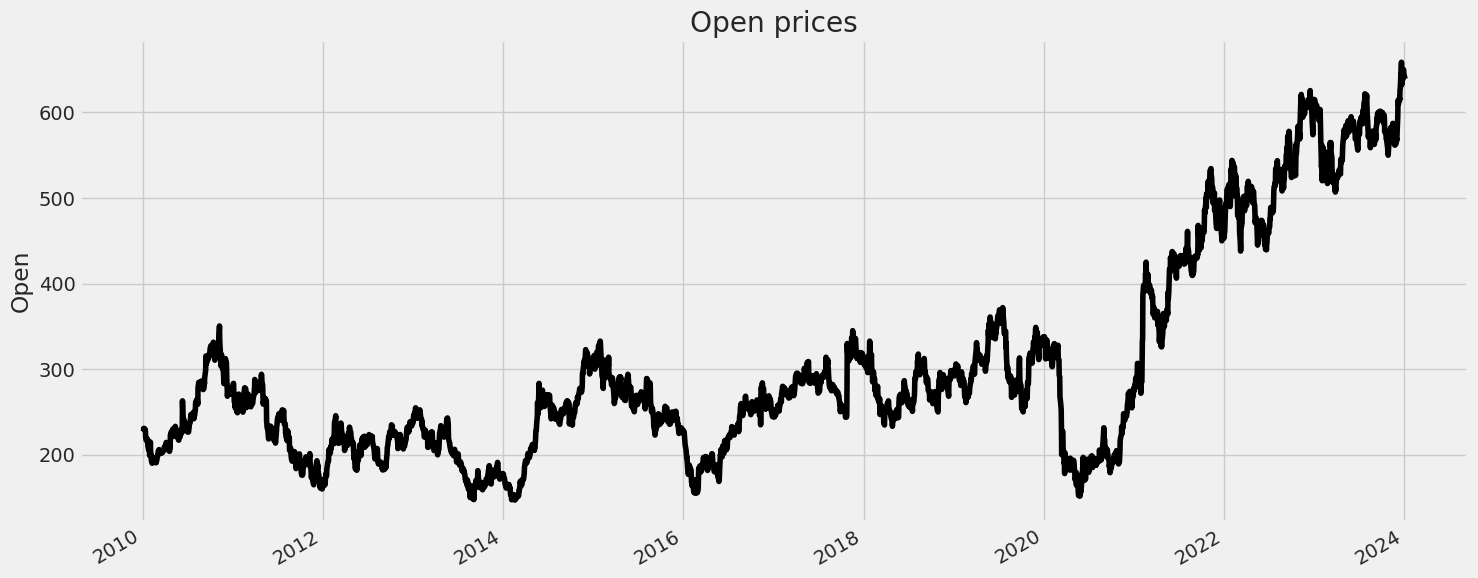

In [10]:
plt.figure(figsize=(15, 6))
df['Open'].plot(c = 'black')
plt.ylabel('Open')
plt.xlabel(None)
plt.title("Open prices")
plt.tight_layout()
plt.show()

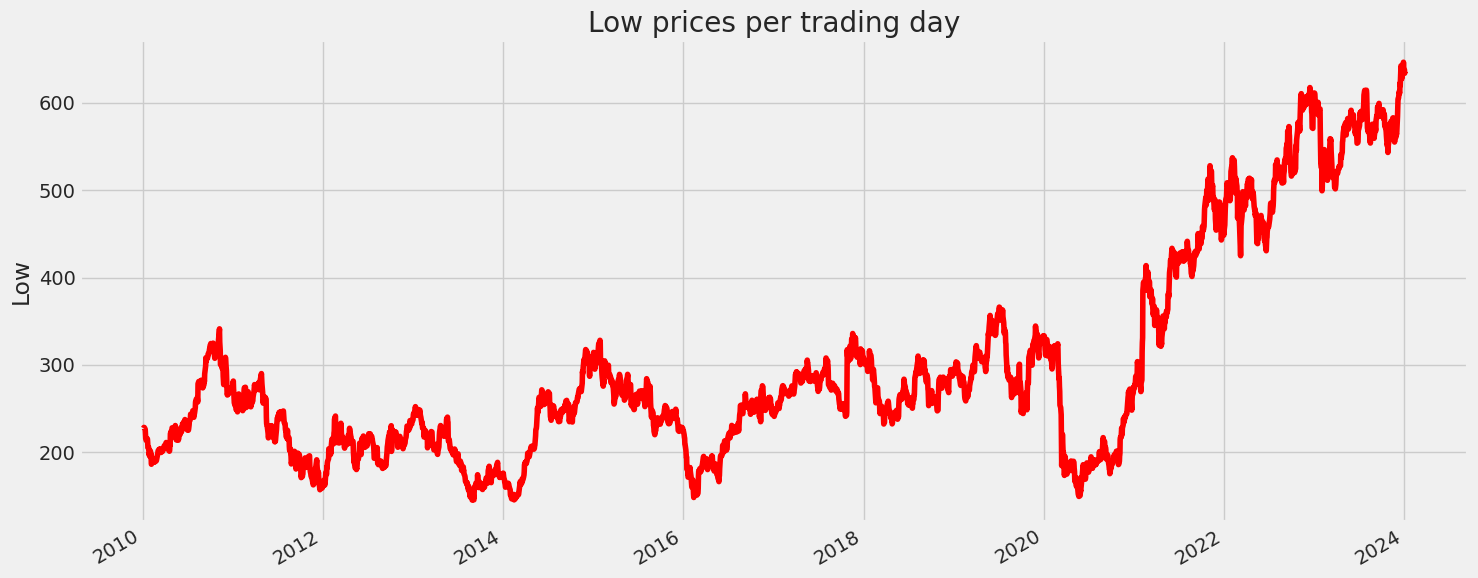

In [11]:
plt.figure(figsize=(15, 6))
df['Low'].plot(c = 'r')
plt.ylabel('Low')
plt.xlabel(None)
plt.title("Low prices per trading day")
plt.tight_layout()
plt.show()

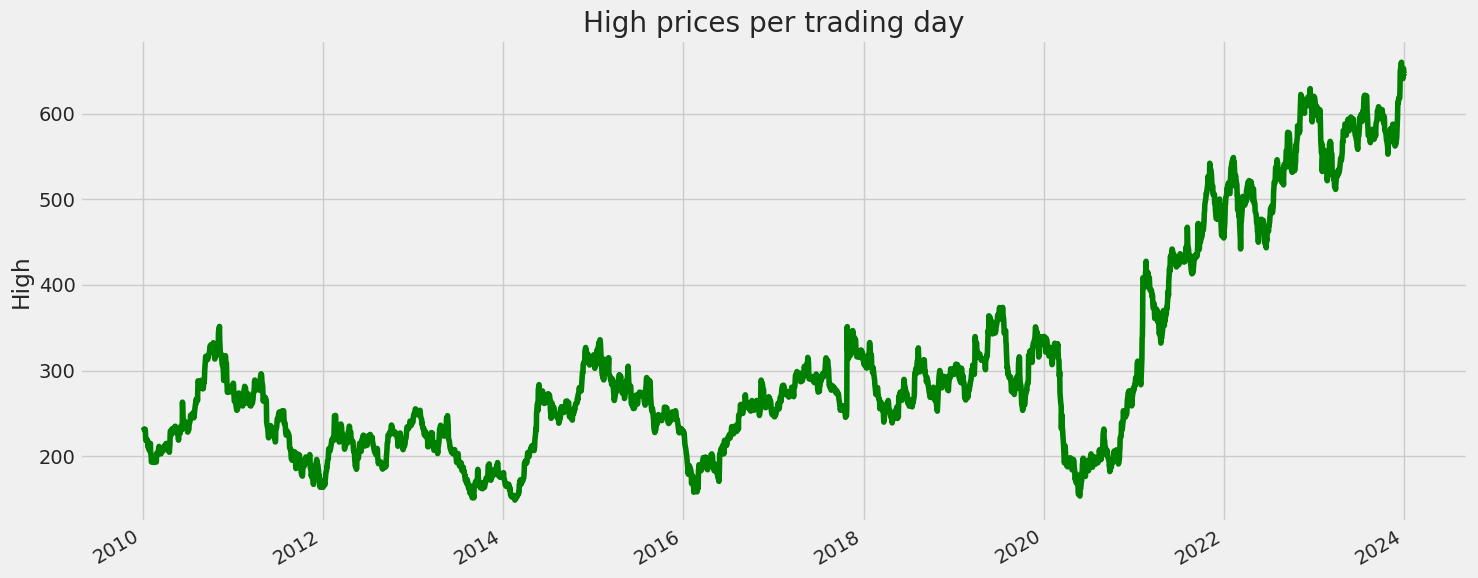

In [12]:
plt.figure(figsize=(15, 6))
df['High'].plot(c = 'g')
plt.ylabel('High')
plt.xlabel(None)
plt.title("High prices per trading day")
plt.tight_layout()
plt.show()

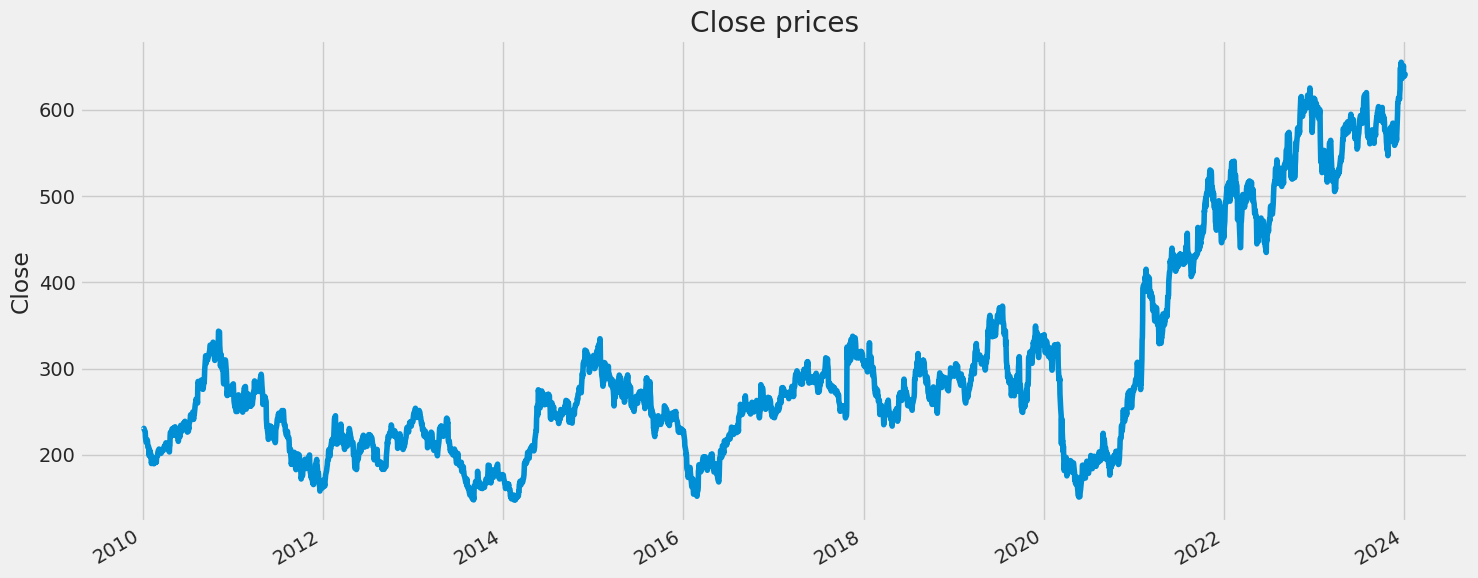

In [13]:
plt.figure(figsize=(15, 6))
df['Close'].plot()
plt.ylabel('Close')
plt.xlabel(None)
plt.title("Close prices")
plt.tight_layout()
plt.show()

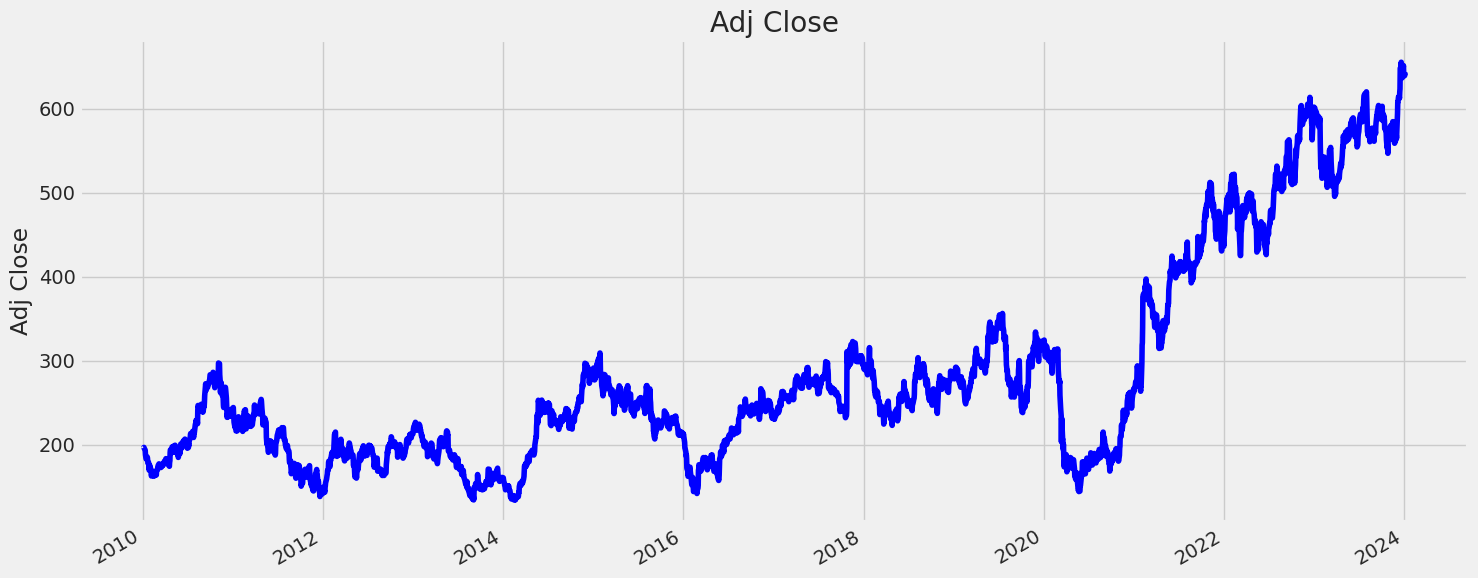

In [14]:
plt.figure(figsize=(15, 6))
df['Adj Close'].plot(c ='blue')
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Adj Close")
plt.tight_layout()
plt.show()

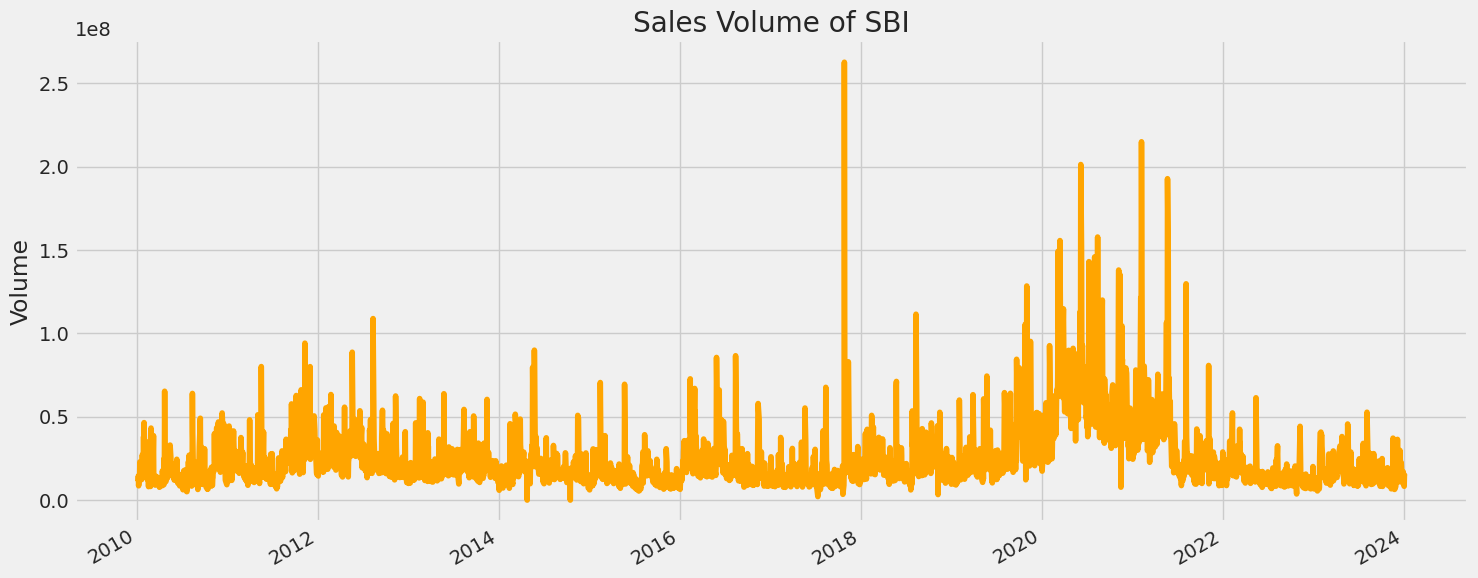

In [15]:
plt.figure(figsize=(15, 6))
df['Volume'].plot(c ='orange')
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Sales Volume of SBI")
plt.tight_layout()
plt.show()

## --> As shown above:
### * Data seems to increase hesitantly from February 2020


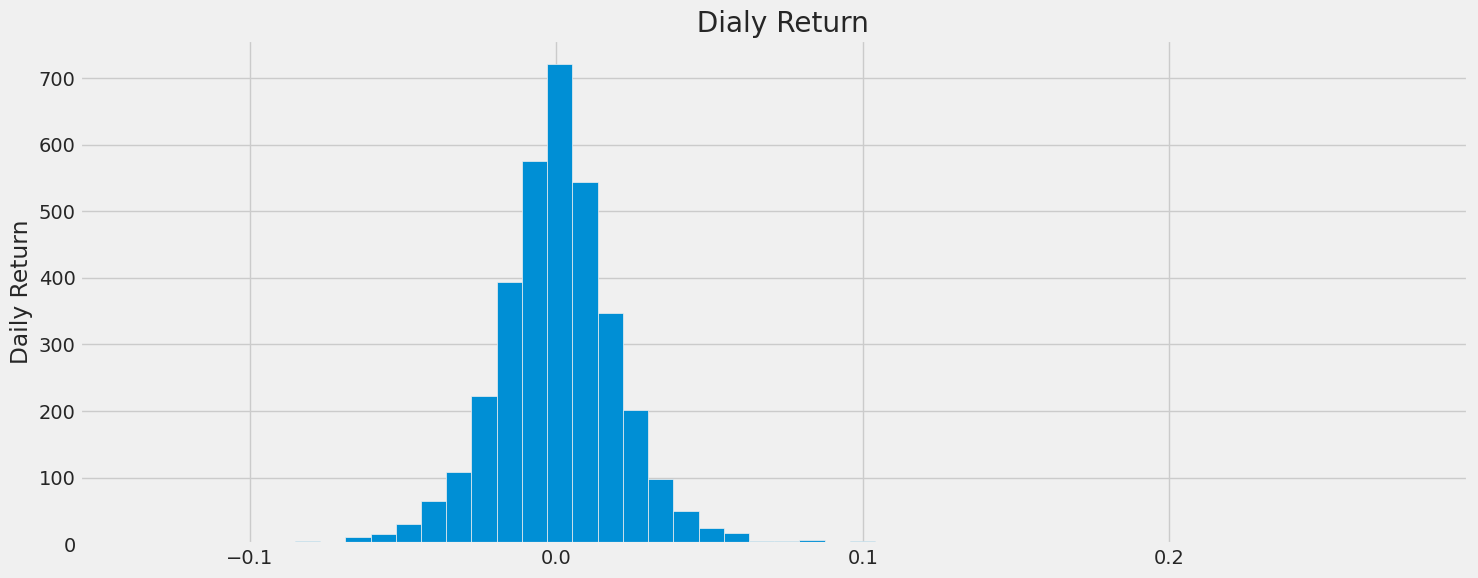

In [16]:
# We'll use pct_change to find the percent change for each day
plt.figure(figsize=(15, 6))
df['Adj Close'].pct_change().hist(bins=50)
plt.ylabel('Daily Return')
plt.title(f'  Dialy Return')
plt.tight_layout()
plt.show()

# 4 Preprocessing

### -->> Define target column [Close]

In [17]:
target = df['Close']
data = pd.DataFrame(target)
data.head()

,Close
Date,
2010-01-04,229.119995
2010-01-05,229.205002
2010-01-06,230.580002
2010-01-07,229.289993
2010-01-08,228.604996


In [18]:
data.shape

(3457, 1)

##### As shown: data need to be scaled

### -->> Normalization

to make values between 0, 1

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
# to get a col vector of data
sc_data = scaler.fit_transform(np.asanyarray(data))

print(sc_data[0: 5])
sc_data.shape

[[0.16093219]
 [0.16109951]
 [0.16380599]
 [0.16126681]
 [0.15991849]]


(3457, 1)

In [20]:
# to reshape data to a column vector (method2)
sc_data = scaler.fit_transform(np.array(data).reshape(-1, 1))
sc_data.shape

(3457, 1)

### -->> Split data into train & test

In [21]:
# 0.75 train,   0.25 test
train_size = int(len(data)* 0.75)
test_size = len(data) - train_size

print("Train_size: ", train_size, "\n\nTest_size: ", test_size)

Train_size:  2592 

Test_size:  865


In [22]:
# Distribute scaled data as sequential data

train_data = sc_data[ :train_size, 0: 1] # or: train_data = sc_data[ :train_size, 0]

test_data = sc_data[train_size-60: , 0: 1]

print("Train_data: ", train_data.shape, "\n\ntest_data: ", test_data.shape)

Train_data:  (2592, 1) 

test_data:  (925, 1)


### -->> Create Train Dataset (Xs, y)

In [23]:
# create dataset with 60 time steps and (59 input and only 1 output in each ) as this is a regression problem
tr_Xs = []
tr_y = []

for i in range(60, len(train_data)):
    tr_Xs.append(train_data[i-60: i,0 ])
    tr_y.append(train_data[i, 0])

# convert Xs, y to arrays
tr_Xs, tr_y = np.array(tr_Xs), np.array(tr_y)

# reshape data -->> Xs = (rows, timestep, [n_cols = 2]), y = (rows,   )
tr_Xs = np.reshape(tr_Xs, (tr_Xs.shape[0], tr_Xs.shape[1], 1))

tr_Xs.shape, tr_y.shape

((2532, 60, 1), (2532,))

# 5 Model structure

In [24]:
model = Sequential([
    LSTM(50, return_sequences = True, input_shape = (tr_Xs.shape[1], 1)),
    GRU(16, return_sequences = False),

    Dense(16),
    Dense(1)
])

## -->> Compilation


In [25]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = 'mae')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 gru (GRU)                   (None, 16)                3264      
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13953 (54.50 KB)
Trainable params: 13953 (54.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# And nowww, Lets train

Sometimes callbacks used and sometimes it affect negatively on training

So,  Lets try with earlystopping , then without it

In [27]:
#define callbacks
#cbacks = [EarlyStopping(monitor = 'loss', patience = 10, restore_best_weights = True)]

history = model.fit(tr_Xs, tr_y, epochs = 100, batch_size = 32)

Epoch 1/100
80/80 [==============================] - 10s 49ms/step - loss: 0.0057 - mae: 0.0497
Epoch 2/100
80/80 [==============================] - 3s 41ms/step - loss: 4.9851e-04 - mae: 0.0167
Epoch 3/100
80/80 [==============================] - 3s 41ms/step - loss: 4.1136e-04 - mae: 0.0153
Epoch 4/100
80/80 [==============================] - 4s 55ms/step - loss: 3.5094e-04 - mae: 0.0141
Epoch 5/100
80/80 [==============================] - 3s 41ms/step - loss: 3.2087e-04 - mae: 0.0135
Epoch 6/100
80/80 [==============================] - 4s 49ms/step - loss: 2.9430e-04 - mae: 0.0129
Epoch 7/100
80/80 [==============================] - 4s 52ms/step - loss: 2.7998e-04 - mae: 0.0126
Epoch 8/100
80/80 [==============================] - 4s 46ms/step - loss: 2.5102e-04 - mae: 0.0118
Epoch 9/100
80/80 [==============================] - 3s 40ms/step - loss: 2.4035e-04 - mae: 0.0115
Epoch 10/100
80/80 [==============================] - 6s 81ms/step - loss: 2.2126e-04 - mae: 0.0110
Epoch 11/100

# Visualise loss [mse] and metric [mae]

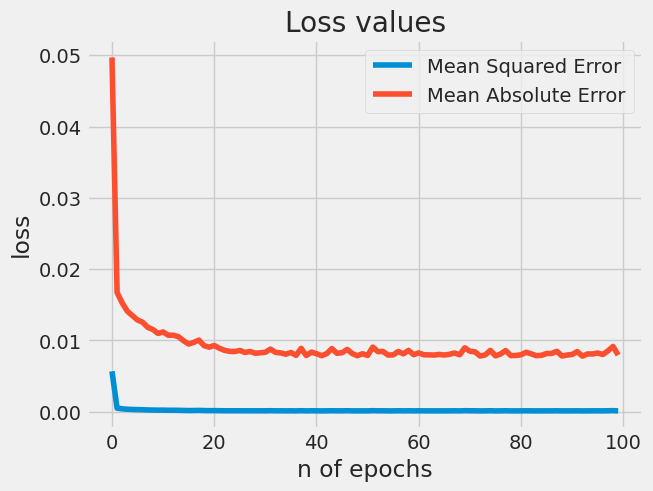

In [28]:
plt.plot(history.history["loss"])
plt.plot(history.history["mae"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Loss values")
plt.xlabel("n of epochs")
plt.ylabel("loss")
plt.show()

# 6 Lets Get Predictions

### -->> Create Test Dataset (Xs, y)

In [29]:
# create dataset with 60 time step and only 1 output as this is a regression problem
ts_Xs = []
ts_y = []

for i in range(60, len(test_data)):
    ts_Xs.append(test_data[i-60: i, 0])
    ts_y.append(test_data[i, 0])

# convert Xs, y to arrays
ts_Xs, ts_y = np.array(ts_Xs), np.array(ts_y)

# reshape data
ts_Xs = np.reshape(ts_Xs, (ts_Xs.shape[0], ts_Xs.shape[1], 1))

ts_Xs.shape, ts_y.shape

((865, 60, 1), (865,))

### -->> Inverse Scaling in predictions [p]

In [30]:
p = model.predict(ts_Xs)
# if we display it, values will be very small as there are scaled before
print(p[0: 5])
print('\n\n')


# So, we will use inverse_transform function to inverse scaling
ps = scaler.inverse_transform(p)
print(ps[0:5])
ps.shape

28/28 [==============================] - 1s 19ms/step
[[0.09661786]
 [0.09107429]
 [0.07857083]
 [0.07444999]
 [0.07933776]]



[[196.44574]
 [193.6294 ]
 [187.27713]
 [185.18358]
 [187.66676]]


(865, 1)

# Evaluation using Root Mean Squared Error [RMSE]

In [31]:
# Inverse ts_y scale
ts_y = scaler.inverse_transform([ts_y])

root_mse = np.sqrt(np.mean(ts_y- ps)**2).round(2)
root_mse

# still try to reach it to smallest value


11.89

# Visualize predictions


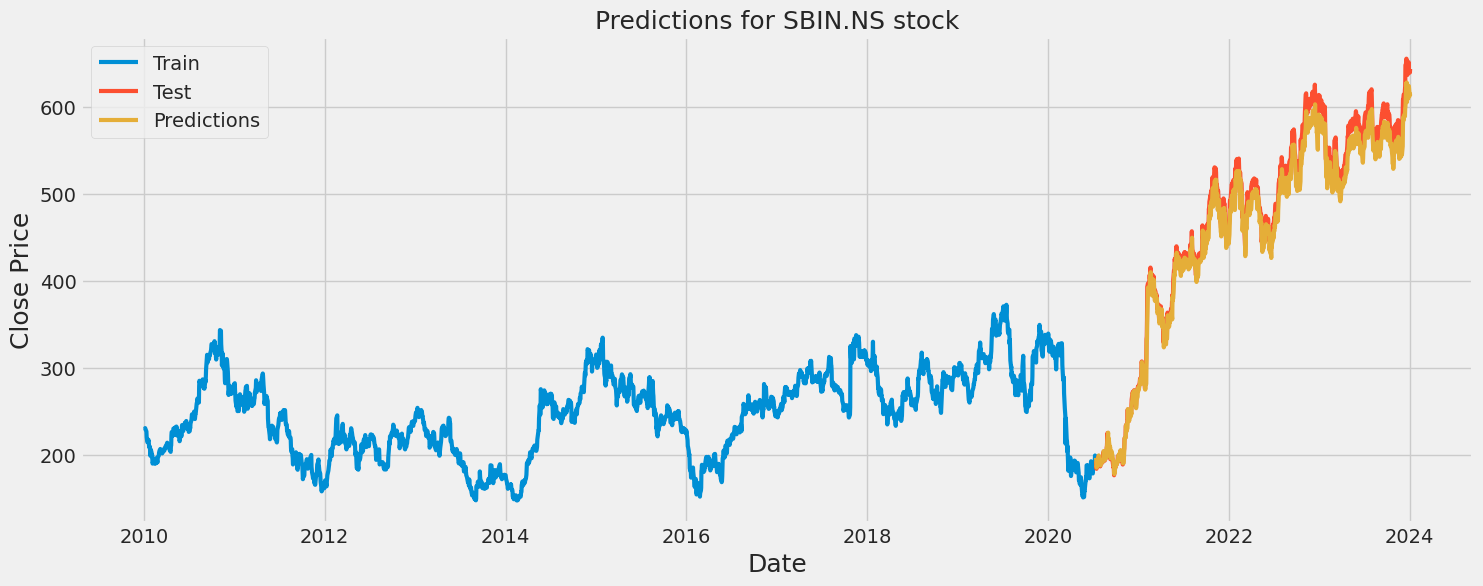

In [32]:
train = data.iloc[ :train_size , 0:1]
test = data.iloc[train_size: , 0:1]
test['Predictions'] = ps

plt.figure(figsize= (16, 6))
plt.title(f'Predictions for {symbol} stock' , fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize= 18)
plt.plot(train['Close'], linewidth= 3)
plt.plot(test['Close'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

# 7 Forcasting month [30 days] Later

In [33]:
# Generate 30 days later
from datetime import timedelta

## -->> Sequence shifiting

In [34]:
# create a function to insert ends into  forcasted data
def insert_end(Xin, new_input):
    timestep = 60 # each timestep include 59 Xs and 1 y
    for i in range(timestep - 1):
        Xin[:, i, :] = Xin[:, i+1, :]
    Xin[:, timestep - 1, :] = new_input
    return Xin

In [35]:
ts_Xs.shape

(865, 60, 1)

In [36]:
future = 30
forcast = []
Xin = ts_Xs[-1 :, :, :] #SLICING INPUT (Xin) like tx_Xs -->> 3Dims
time = []
for i in range(0, future):
    out = model.predict(Xin, batch_size=5)
    forcast.append(out[0, 0])
    print(forcast)
    Xin = insert_end(Xin, out[0, 0])
    time.append(pd.to_datetime(df.index[-1]) + timedelta(days=i)) #Append generated datetime in 'time' list

1/1 [==============================] - 0s 24ms/step
[0.91633976]
1/1 [==============================] - 0s 25ms/step
[0.91633976, 0.8576345]
1/1 [==============================] - 0s 28ms/step
[0.91633976, 0.8576345, 0.8065672]
1/1 [==============================] - 0s 25ms/step
[0.91633976, 0.8576345, 0.8065672, 0.7643984]
1/1 [==============================] - 0s 25ms/step
[0.91633976, 0.8576345, 0.8065672, 0.7643984, 0.72821844]
1/1 [==============================] - 0s 26ms/step
[0.91633976, 0.8576345, 0.8065672, 0.7643984, 0.72821844, 0.6961438]
1/1 [==============================] - 0s 26ms/step
[0.91633976, 0.8576345, 0.8065672, 0.7643984, 0.72821844, 0.6961438, 0.666952]
1/1 [==============================] - 0s 26ms/step
[0.91633976, 0.8576345, 0.8065672, 0.7643984, 0.72821844, 0.6961438, 0.666952, 0.6400239]
1/1 [==============================] - 0s 39ms/step
[0.91633976, 0.8576345, 0.8065672, 0.7643984, 0.72821844, 0.6961438, 0.666952, 0.6400239, 0.6150363]
1/1 [============

## -->> Create a dataframe of forcasted data

In [37]:
later30 = np.array(forcast) # CREATE aN ARRAY OF FORCAST LIST THEN RESHAPE IT TO A VECTOR COLUMN
later30 = np.array(forcast).reshape(-1, 1)
later30 = scaler.inverse_transform(later30)

later30 = pd.DataFrame(later30)

# CONVERT TIME LIST TO DATAFRAME
datetime = pd.DataFrame(time)

# Concat two dfs 'later30', 'datetime'
nextmonth = pd.concat([datetime, later30], axis = 1)
nextmonth.columns = 'Datetime', 'Close price thirty days later'

nextmonth

,Datetime,Close price thirty days later
0,2024-01-03,612.897278
1,2024-01-04,583.072693
2,2024-01-05,557.128418
3,2024-01-06,535.705017
4,2024-01-07,517.324097
5,2024-01-08,501.028900
6,2024-01-09,486.198303
7,2024-01-10,472.517731
8,2024-01-11,459.823059
9,2024-01-12,448.019806


## Lets visualize forcasted data

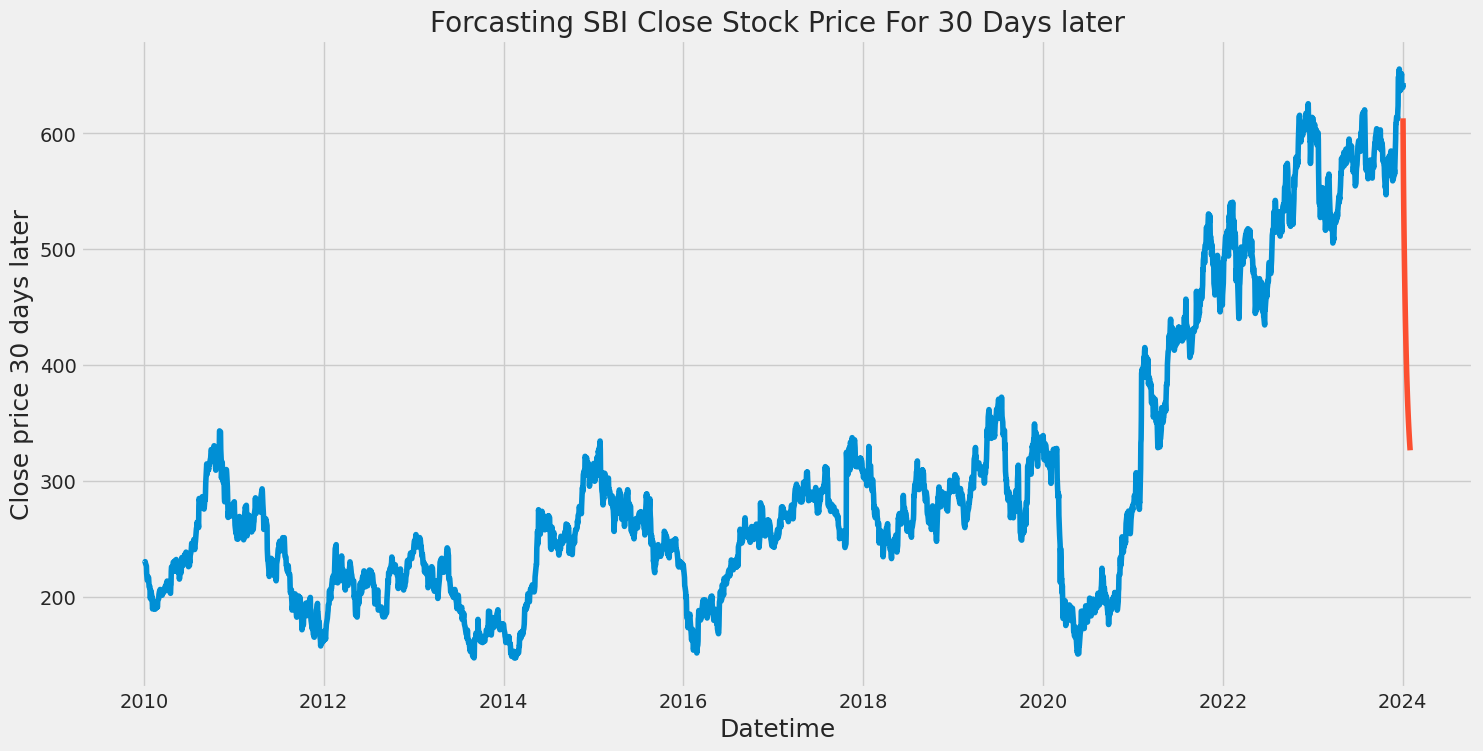

In [38]:
plt.figure(figsize=(16, 8))
plt.title('Forcasting SBI Close Stock Price For 30 Days later')
plt.xlabel('Datetime', fontsize=18)
plt.ylabel('Close price 30 days later' ,fontsize=18)
plt.plot(df['Close'])
plt.plot(nextmonth.set_index('Datetime')[['Close price thirty days later']])

## Thank you!

## If you found it useful, please upvote it

In [42]:
model.save('my_model.keras')


In [44]:
import pickle

In [46]:
pickle.dump(model,open('/conten/my_model.keras', 'wb'))
model_load = pickle.load(open('/content/model_analysis1','rb'))

# model_load.predict()

FileNotFoundError: [Errno 2] No such file or directory: '/conten/my_model'

In [50]:
import yfinance as yf

start = '2010-01-01'
end = '2024-01-04'
symbol = 'TCS'
df = yf.download(symbol, start=start, end=end)
df

new_data= df['Close']

model_load = keras.models.load_model('my_model.keras')
predictions = model_load.predict(new_data)

predictions

[*********************100%%**********************]  1 of 1 completed


80/80 [==============================] - 1s 2ms/step


array([[4.0348783],
       [4.0361433],
       [4.0361433],
       ...,
       [2.0720978],
       [2.1583865],
       [2.134229 ]], dtype=float32)

[*********************100%%**********************]  1 of 1 completed


31/31 [==============================] - 1s 18ms/step


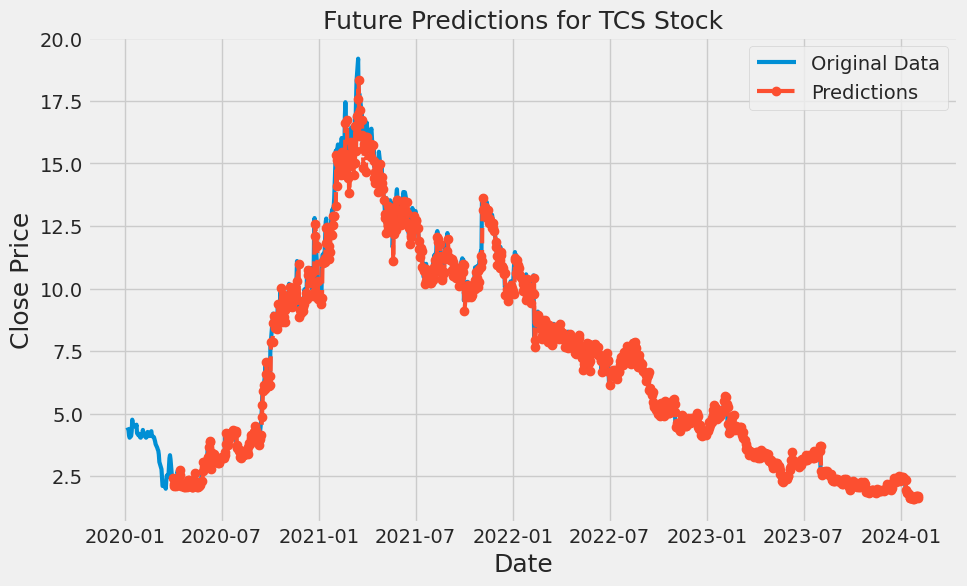

In [59]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow import keras

from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Download historical data
start = '2020-01-05'  # Start from the next day after your training data ends
end = '2024-02-03'  # Choose an end date for the future predictions
symbol = 'TCS'
df_future = yf.download(symbol, start=start, end=end)

# Extract the 'Close' prices
new_data = pd.DataFrame(df_future['Close'])

# Load the pre-trained model
model_load = load_model('my_model.keras')

# Normalize the new data using the same scaler used during training
scaler = MinMaxScaler(feature_range=(0, 1))
new_data_scaled = scaler.fit_transform(np.asanyarray(new_data).reshape(-1, 1))

# Create sequential data for the new input
new_data_seq = []
for i in range(60, len(new_data_scaled)):
    new_data_seq.append(new_data_scaled[i-60:i, 0])

new_data_seq = np.array(new_data_seq)

# Reshape data for model input
new_data_seq = np.reshape(new_data_seq, (new_data_seq.shape[0], new_data_seq.shape[1], 1))

# Make predictions on the new data
predictions = model_load.predict(new_data_seq)

# Inverse transform the predictions to get back the original scale
predictions_original_scale = scaler.inverse_transform(predictions)

# Visualize the original data and predictions
plt.figure(figsize=(10, 6))
plt.plot(new_data.index, new_data, label='Original Data', linewidth=3)
plt.plot(new_data.index[60:], predictions_original_scale, label='Predictions', linestyle='--', marker='o', linewidth=3)
plt.title(f'Future Predictions for {symbol} Stock', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend()
plt.show()


In [58]:
# Create a DataFrame with original and predicted values
results_df = pd.DataFrame({
    'Date': new_data.index[60:],
    'Original': new_data.values[60:].flatten(),
    'Predicted': predictions_original_scale.flatten()
})
# Display the DataFrame
results_df

,Date,Original,Predicted
0,2020-04-01,2.02,2.420135
1,2020-04-02,2.12,2.097449
2,2020-04-03,2.02,2.185545
3,2020-04-06,2.18,2.089544
4,2020-04-07,2.14,2.236786
...,...,...,...
962,2024-01-29,1.62,1.699738
963,2024-01-30,1.64,1.681091
964,2024-01-31,1.63,1.700566
965,2024-02-01,1.58,1.692620
